# **Bank campaign**
## Exploratory Data Analysis

Carlos Garavito
***

In [4]:
# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# set no limit to raw display with pandas
pd.set_option('display.max_rows', None)

# define working paths
PROJECT_PATH = os.getcwd()
RAWDATA_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'raw')

In [5]:
# read raw data
file_2 = os.path.join(RAWDATA_PATH, "Bank_Campaign.csv")
df_raw_data = pd.read_csv(file_2,  sep = ";")


## General overview
***

In [3]:
# check head of data set
df_raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# chek for quantity rows and columns of data set
df_raw_data_shape = df_raw_data.shape

print(f"This data set contains {df_raw_data_shape[0]} rows and {df_raw_data_shape[1]} columns.")

This data set contains 41188 rows and 21 columns.


In [7]:
# check for columns 
df_raw_data_shape_columns = list(df_raw_data.columns)

print(f"The data set contains the following columns: \n{df_raw_data_shape_columns}")

The data set contains the following columns: 
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']


**Note 1:** The target variable is `subscribed`

In [8]:
# Check if the data set is imbalanced
possitive_response = df_raw_data[df_raw_data['subscribed'] == 'yes']
negative_response = df_raw_data[df_raw_data['subscribed'] == 'no']

print ("Possitive: %i (%.1f%%)"%(len(possitive_response), float(len(possitive_response))/len(df_raw_data)*100.0))
print ("Negative: %i (%.1f%%)"%(len(negative_response), float(len(negative_response))/len(df_raw_data)*100.0))
print ("Total sample: %i"%len(df_raw_data))

## Note
# Data set is imbalaced!

Possitive: 4639 (11.3%)
Negative: 36546 (88.7%)
Total sample: 41188


**Note 2:** The data set is imbalanced. 

To evaluate models, use two of the following: 
- Marco F1 score *
- AUC score (AUC ROC) *
- Average precision score (AP)
- G-Mean

In [9]:
# identify null values by percentage
missing_values = df_raw_data.isnull()
missing_values.sum() / len(df_raw_data)

age               0.000000
job               0.000000
marital           0.000000
education         0.000000
default           0.000000
housing           0.000000
loan              0.000000
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
subscribed        0.000073
dtype: float64

**Note 3**: There is no null values. Last three registers are null due to evaluation purposes.

In [10]:
df_raw_data.tail(3).to_csv(os.path.join(RAWDATA_PATH, "Bank_Campaign_3_registers.csv"), index = False)

# select only working data without last 3 null registers
df_raw_data = df_raw_data[~df_raw_data['subscribed'].isnull()]
df_raw_data.tail(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


## Univariate analysis
***

In [11]:
list_client_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'subscribed']
list_current_camp_features = ['contact', 'month', 'day_of_week', 'duration', 'subscribed']
list_other_current_camp_features = ['campaign', 'pdays', 'previous', 'poutcome', 'subscribed']
list_social_economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']

### Client features

Client features dictionary data: 
- age (numeric)
- job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
- marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
- education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
- default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
- housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
- loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)

In [12]:
df_raw_data[list_client_features].head()

,age,job,marital,education,default,housing,loan,subscribed
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


<AxesSubplot:title={'center':'Boxplot - Age'}, xlabel='subscribed', ylabel='age'>

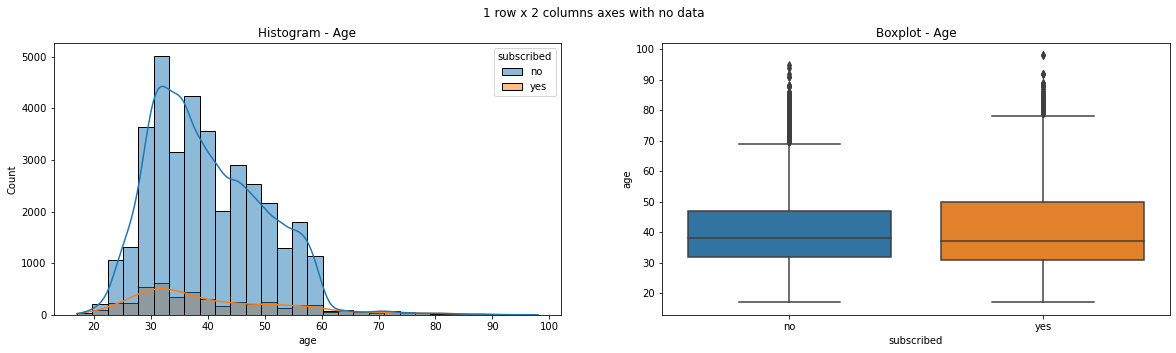

In [50]:
# age histogram and boxplot
fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('1 row x 2 columns axes with no data')
axes[0].set_title("Histogram - Age")
axes[1].set_title("Boxplot - Age")
sns.histplot(data=df_raw_data, x="age", kde=True, hue='subscribed', bins = 30, ax=axes[0])
sns.boxplot(x = 'subscribed', y = 'age', data = df_raw_data, ax=axes[1])

<Figure size 432x288 with 0 Axes>

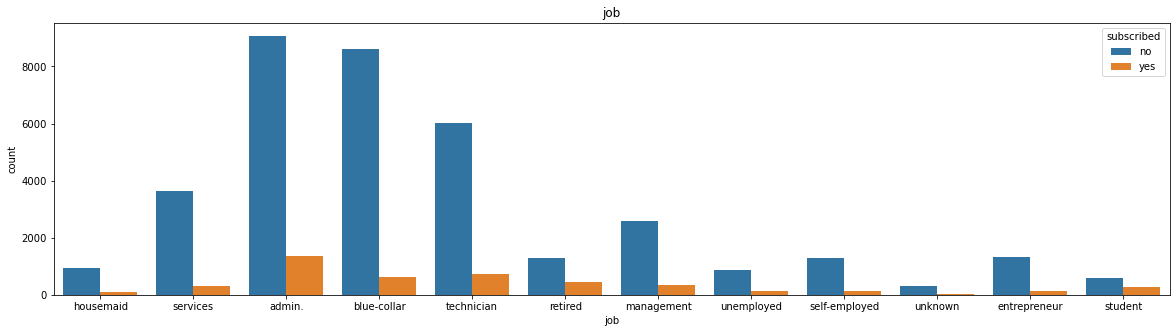

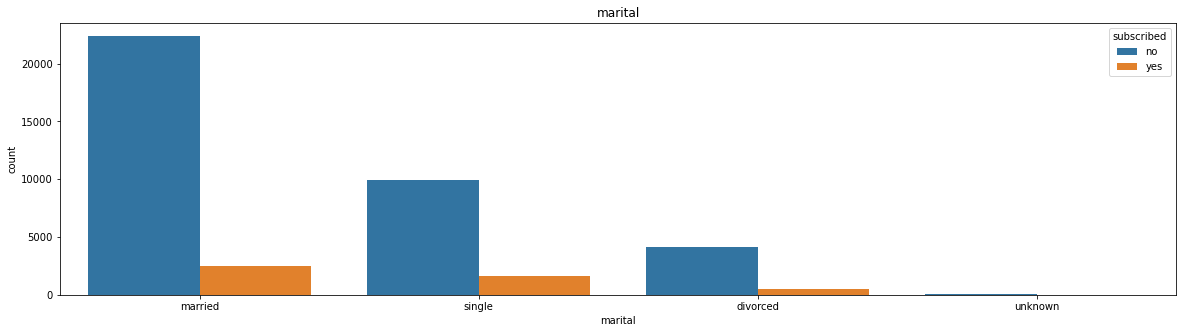

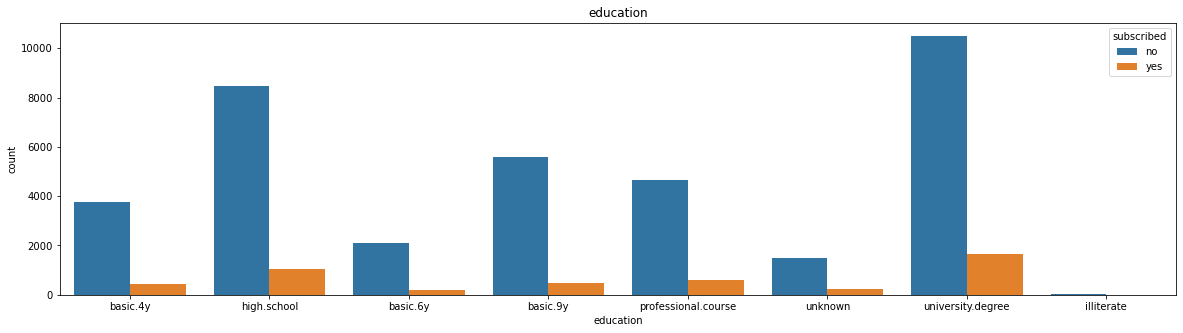

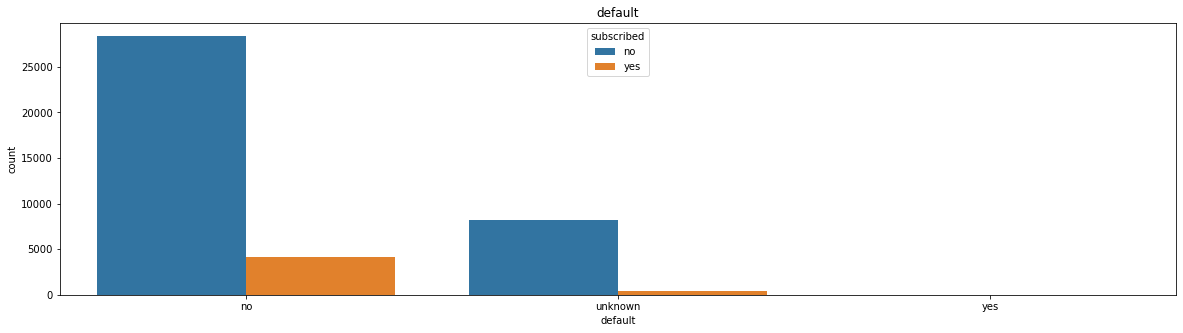

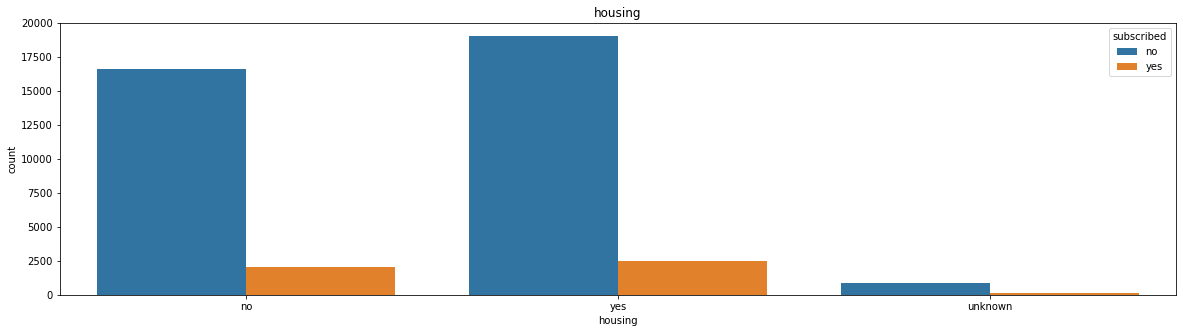

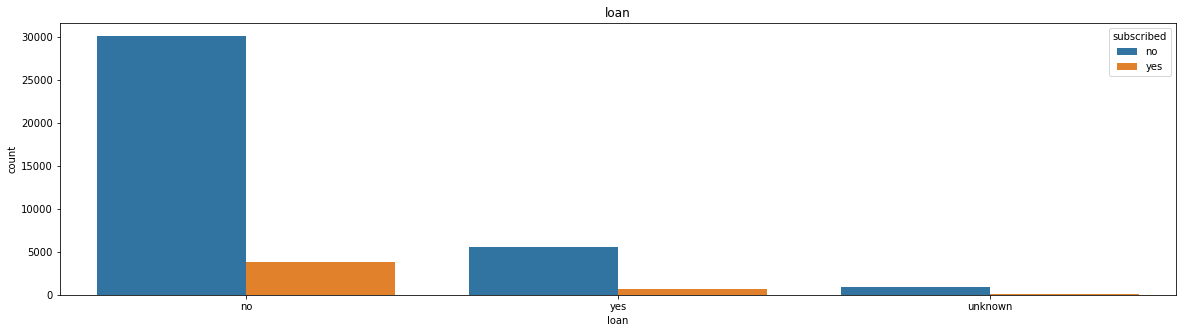

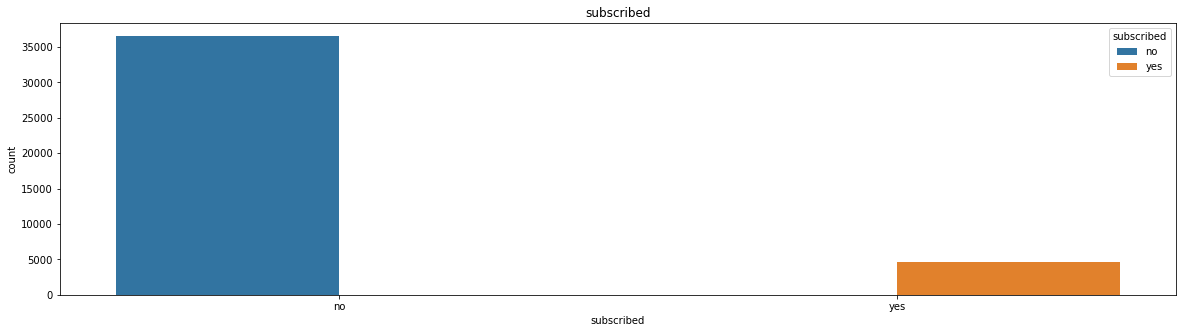

In [35]:
# count for categorical features
for i, field in enumerate(list_client_features):
    if field == 'age': 
        continue
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.title(field)
    sns.countplot(x=field, data=df_raw_data, hue = 'subscribed')

    

### Current campaign

Current campaing dictionary data:
- contact: contact communication type (categorical: ‘cellular’,’telephone’)
- month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
- day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
- duration: last contact duration, in seconds (numeric).

In [15]:
df_raw_data[list_current_camp_features].head()

,contact,month,day_of_week,duration,subscribed
0,telephone,may,mon,261,no
1,telephone,may,mon,149,no
2,telephone,may,mon,226,no
3,telephone,may,mon,151,no
4,telephone,may,mon,307,no


<AxesSubplot:title={'center':'Boxplot - Duration'}, xlabel='subscribed', ylabel='duration'>

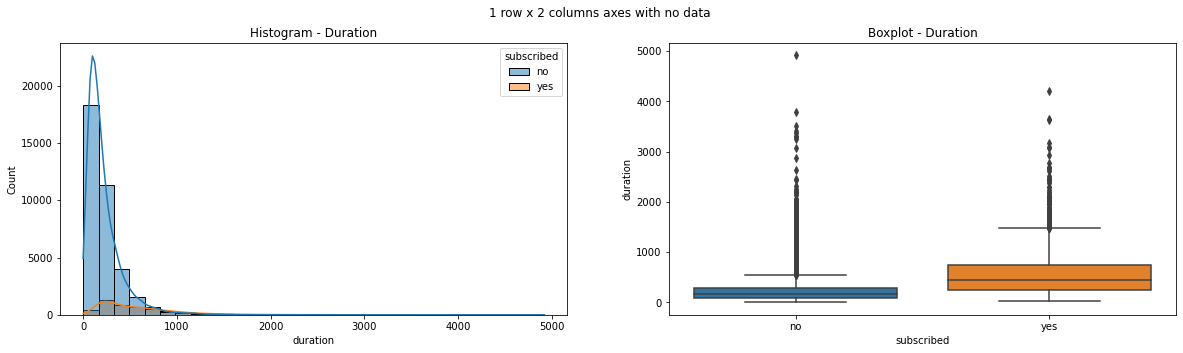

In [51]:
# duration histogram and boxplot
fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('1 row x 2 columns axes with no data')
axes[0].set_title("Histogram - Duration")
axes[1].set_title("Boxplot - Duration")
sns.histplot(data=df_raw_data, x="duration", kde=True, hue='subscribed', bins = 30, ax=axes[0])
sns.boxplot(x = 'subscribed', y = 'duration', data = df_raw_data, ax=axes[1])

<Figure size 432x288 with 0 Axes>

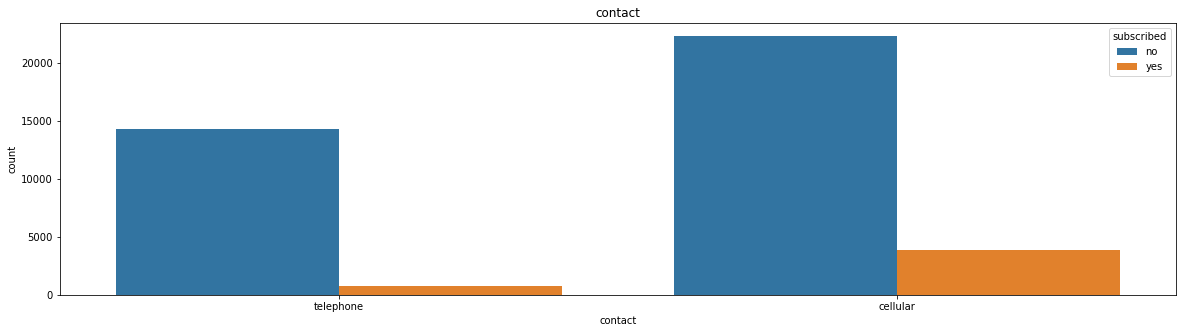

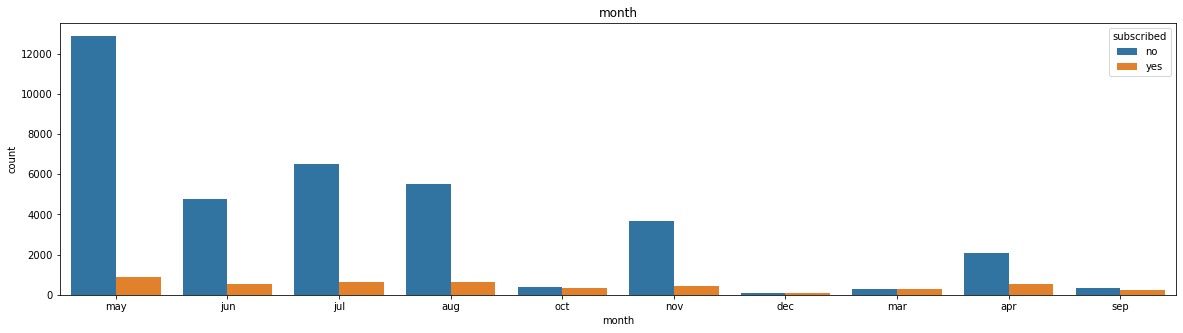

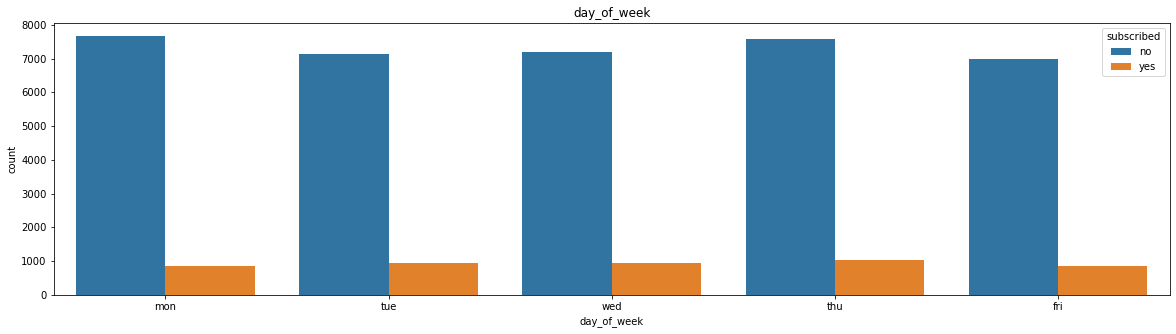

In [17]:
# count for categorical features
for i, field in enumerate(list_current_camp_features):
    if field == 'duration' or field == 'subscribed': 
        continue
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.title(field)
    sns.countplot(x=field, data=df_raw_data, hue = 'subscribed')

### Other features from current campaign

Other features from current campaign dictionary data:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)

In [18]:
df_raw_data[list_other_current_camp_features].head()

,campaign,pdays,previous,poutcome,subscribed
0,1,999,0,nonexistent,no
1,1,999,0,nonexistent,no
2,1,999,0,nonexistent,no
3,1,999,0,nonexistent,no
4,1,999,0,nonexistent,no


<Figure size 432x288 with 0 Axes>

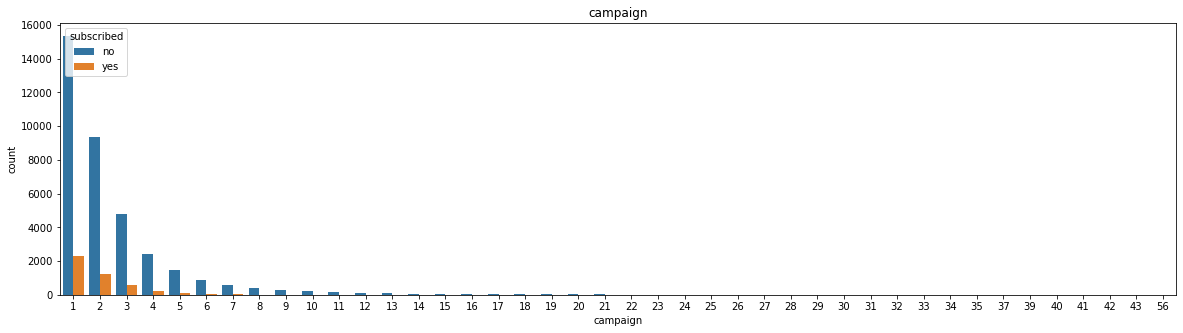

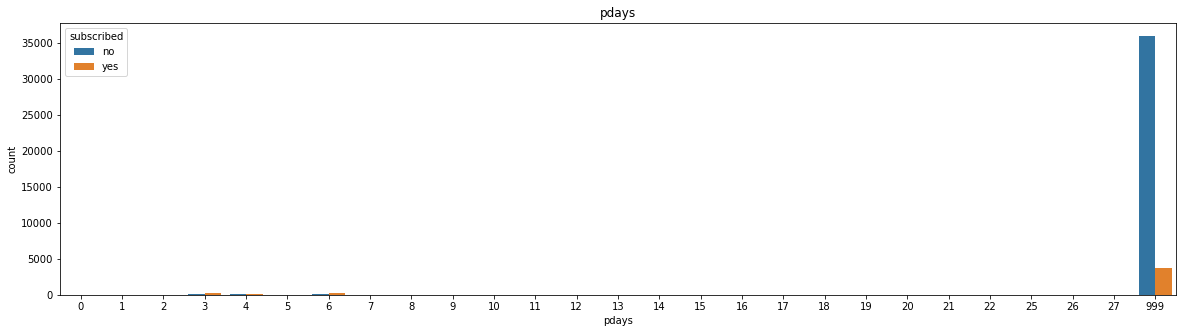

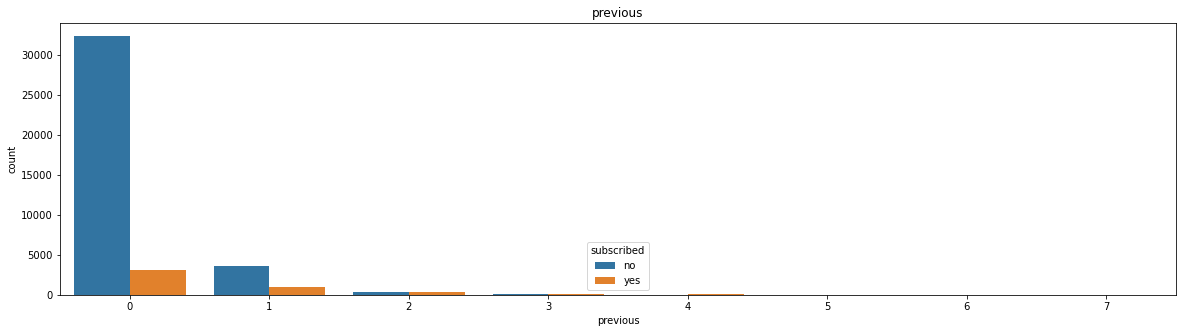

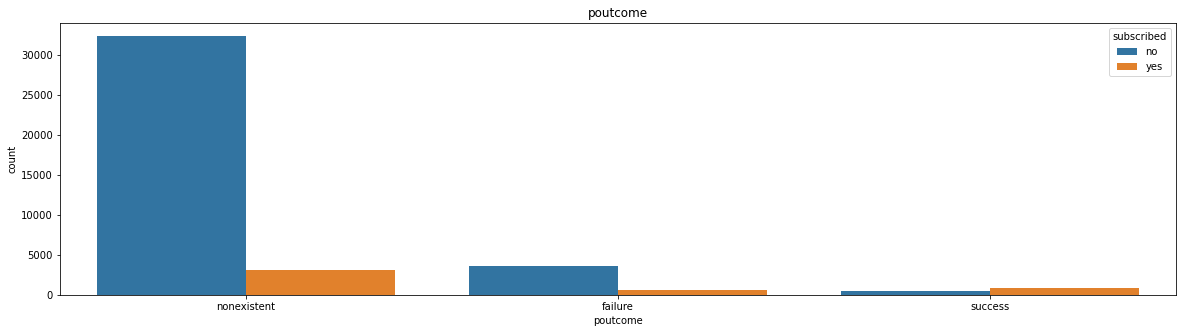

In [19]:
# count for categorical features
for i, field in enumerate(list_other_current_camp_features):
    if field == 'subscribed': 
        continue
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.title(field)
    sns.countplot(x=field, data=df_raw_data, hue = 'subscribed')

### Social and economics features

Social and economics festures dictionaty data:
- emp.var.rate: employment variation rate — quarterly indicator (numeric)
- cons.price.idx: consumer price index — monthly indicator (numeric)
- cons.conf.idx: consumer confidence index — monthly indicator (numeric)
- euribor3m: euribor 3 month rate — daily indicator (numeric)
- nr.employed: number of employees — quarterly indicator (numeric)

In [20]:
df_raw_data[list_social_economic_features].sample(5)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
15493,1.4,93.918,-42.7,4.957,5228.1,no
10067,1.4,94.465,-41.8,4.958,5228.1,no
15262,1.4,93.918,-42.7,4.958,5228.1,no
9660,1.4,94.465,-41.8,4.961,5228.1,no
33934,-1.8,92.893,-46.2,1.281,5099.1,no


<AxesSubplot:title={'center':'Boxplot - euribor3m'}, xlabel='subscribed', ylabel='euribor3m'>

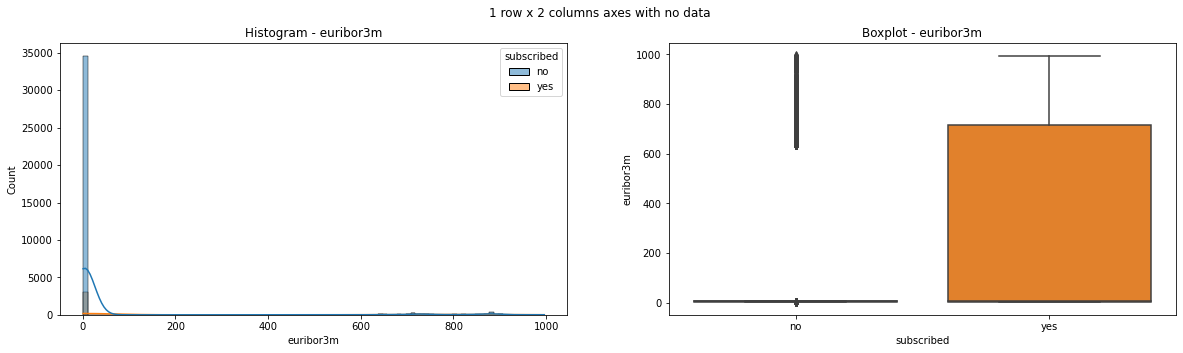

In [26]:
# # age histogram
# plt.figure(figsize=(20,5))
# sns.histplot(data=df_raw_data, x="euribor3m", hue='subscribed', kde=True)


# duration histogram and boxplot
fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('1 row x 2 columns axes with no data')
axes[0].set_title("Histogram - euribor3m")
axes[1].set_title("Boxplot - euribor3m")
sns.histplot(data=df_raw_data, x="euribor3m", kde=True, hue='subscribed', bins = 100, ax=axes[0])
sns.boxplot(x = 'subscribed', y = 'euribor3m', data = df_raw_data, ax=axes[1])


<Figure size 432x288 with 0 Axes>

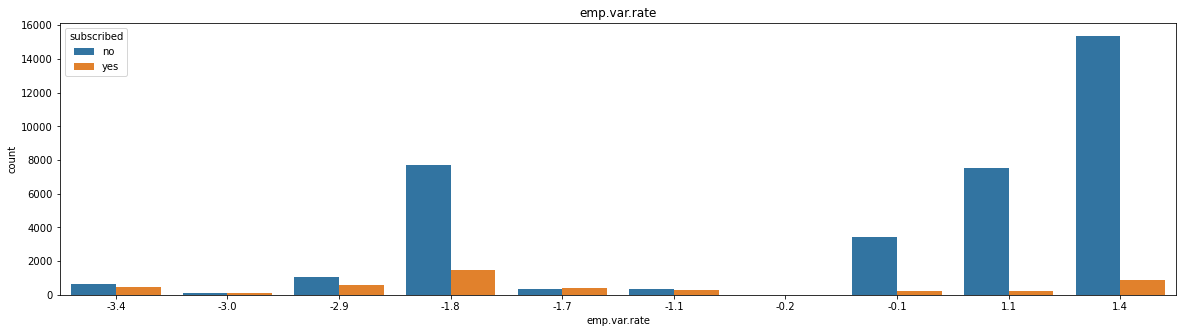

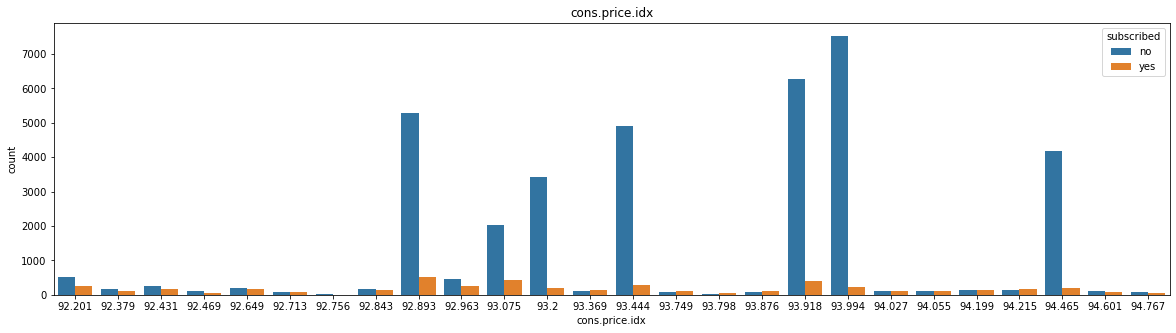

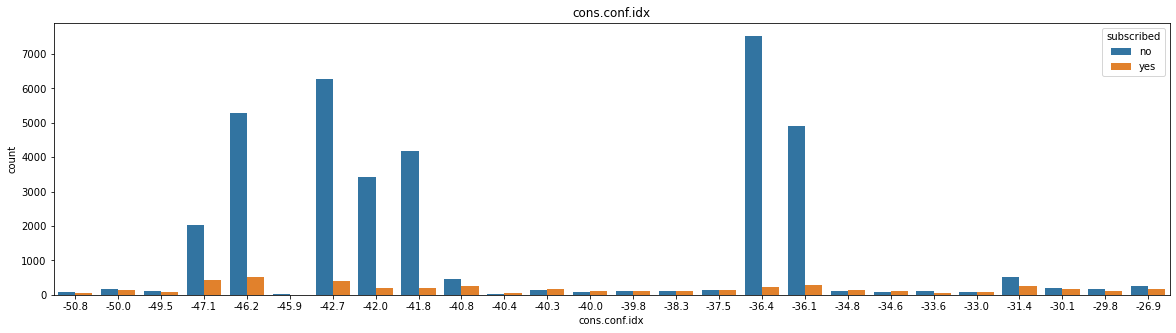

<Figure size 432x288 with 0 Axes>

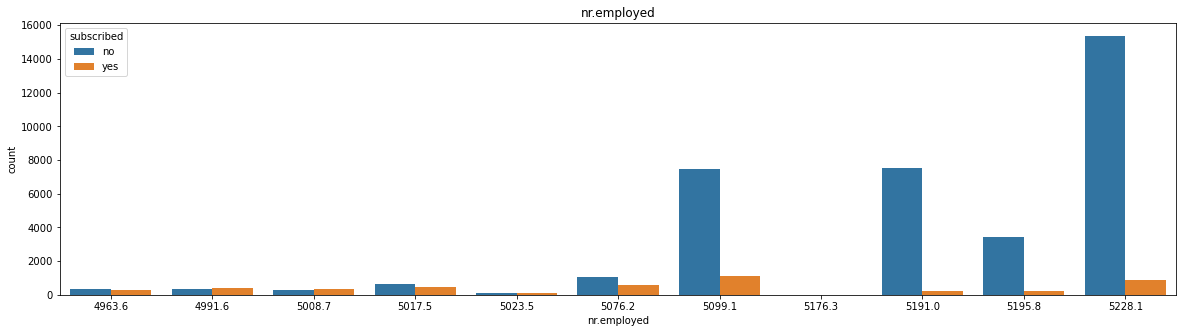

In [24]:
# count for categorical features
for i, field in enumerate(list_social_economic_features):
    if field == 'subscribed' or field == 'euribor3m': 
        continue
    plt.figure(i)
    plt.figure(figsize=(20,5))
    plt.title(field)
    sns.countplot(x=field, data=df_raw_data, hue = 'subscribed')

## Correlation of numeric parameters

<AxesSubplot:>

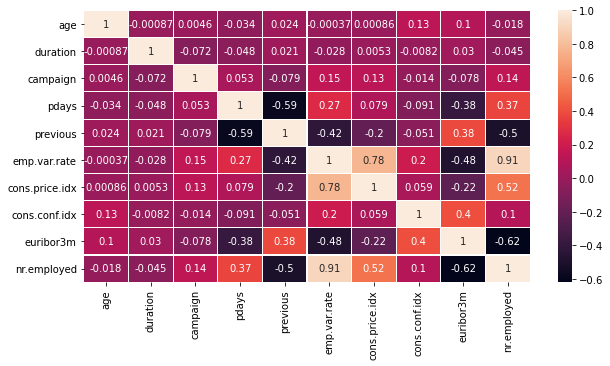

In [21]:
corr = df_raw_data.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True, linewidth=0.1)

<AxesSubplot:>

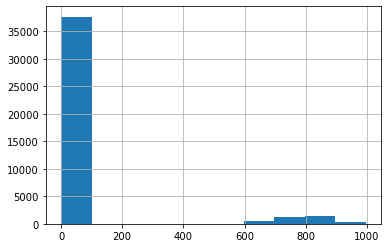

In [23]:
df_raw_data["euribor3m"].hist()